In [3]:
import tensorflow as tf
from tensorflow import keras

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [9]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

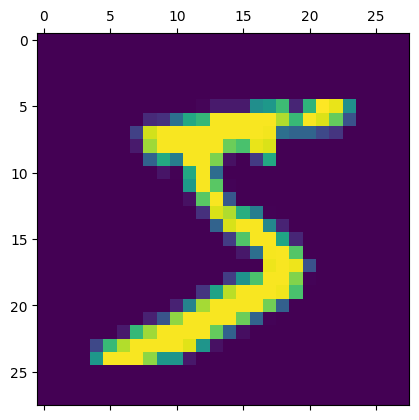

In [11]:
plt.matshow(x_train[0])

In [13]:
x_train = x_train/255
x_test = x_test/255

In [14]:
x_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer='sgd',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

In [18]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10) 

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3006 - accuracy: 0.1138 - val_loss: 2.2998 - val_accuracy: 0.1135
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3000 - accuracy: 0.1124 - val_loss: 2.2995 - val_accuracy: 0.1135
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2996 - accuracy: 0.1124 - val_loss: 2.2992 - val_accuracy: 0.1135
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2993 - accuracy: 0.1124 - val_loss: 2.2988 - val_accuracy: 0.1135
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2989 - accuracy: 0.1124 - val_loss: 2.2984 - val_accuracy: 0.1135
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2986 - accuracy: 0.1124 - val_loss: 2.2982 - val_accuracy: 0.1135
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2982 - accuracy: 0.1124 - val_loss: 2.2976 - val_accuracy:

In [19]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 2.2964 - accuracy: 0.1135
loss=2.296
Accuracy=0.113


<function matplotlib.pyplot.show(close=None, block=None)>

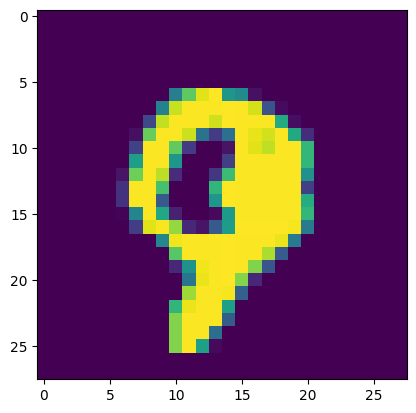

In [20]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show

In [21]:
test_predict = model.predict(x_test)
test_predict_labels = np.argmax(test_predict,axis=1)
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=test_predict_labels)
print('confusion matrix of the test set:\n',confusion_matrix)

313/313 [==============================] - 0s 1ms/step
confusion matrix of the test set:
 tf.Tensor(
[[   0  980    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0  982    0    0    0    0    0    0    0    0]
 [   0  892    0    0    0    0    0    0    0    0]
 [   0  958    0    0    0    0    0    0    0    0]
 [   0 1028    0    0    0    0    0    0    0    0]
 [   0  974    0    0    0    0    0    0    0    0]
 [   0 1009    0    0    0    0    0    0    0    0]], shape=(10, 10), dtype=int32)
